## Базы данных. Python Database API
***

Database API (DB-API) — универсальный интерфейс для клиентов разных реляционных баз данных. DB-API по сути является набором правил (спецификаций) обращения к бащам данным, сформированным в документе PEP-249 (www.python.org/dev/peps/pep-0249/)

### Написание низкоуровневых запросов SQL

#### SQLite и библиотека sqlite3

In [7]:
import sqlite3

con = sqlite3.connect("/home/semyonk/sirius/python-for-beginners/lections/files_and_images/database.sqlite")
cursor = con.cursor()

print(con)
print(cursor)

#### Синтаксис SQL запросов. Получение информации из базы данных

Для получения информации, хранящейся в базе данных, используется оператор SELECT

In [ ]:
SELECT [DISTINCT | ALL] поле_1, поле_2, поле_3 
FROM таблица 
[WHERE условия_фильтрации_данных]
[GROUP BY поле_таблицы_для_группировки]
[HAVING условия_фильтрации_после_группировки]
[ORDER BY основание_для_сортировки [ASC | DESC]]
[LIMIT ограничение_количество_возвращаемых_строк]

Параметры оператора **SELECT**:

|Параметр   | Описание                                                              |
|-----------|-----------------------------------------------------------------------|
| **DISTINCT**  | Удаляет повторяющиеся строки из результата                            |
| **ALL**       | Не удаляет повторы из результата.<br/>Является значением по-умолчанию           |
| **FROM**      | Имя таблцы/таблиц, из которой необходимо взять данные                           |
| **WHERE**     | Условный оператор, использующийся для <br/>описания условия фильтрации               |
| **GROUP BY**  | Оператор группировки строк |
| **HAVING**    | Оператор фильтрации данных по значениям <br/>аггрегирующей функции после группировки |
| **ORDER BY**  | Оператор сортировки результата|
| **ASC**       | Восходящий порядок сортировки|
| **DESC**      | Нисходящий порядок сортировки|
| **LIMIT**     | Ограничение количества возвращаемых строк|
| **AS**        | Оператор переименовывающий поля и таблицы<br/>в возвращаемых данных  |

Следует отметить, что порядок выполнения компонентов запроса определяется СУБД и может меняться. В общем случае порядок выглдяит так:

1. **FROM**
2. **WHERE**
3. **GROUP BY**
4. **HAVING**
5. **SELECT**
6. **DISTINCT**
7. **ORDER BY**

In [9]:
import sqlite3

#con = sqlite3.connect("datafile.db")
cursor = con.cursor()

result = cursor.execute("SELECT * FROM chip_experiments LIMIT 5") # 5 записей из таблицы chip_experiments
print(result)
result.fetchall()

[('EXP054028',
  'Input',
  'Homo sapiens',
  'Treatment: None',
  None,
  2607,
  'chip_control',
  None),
 ('EXP054853',
  'Med1/TRAP220 (Bethyl, A300-793A-2)',
  'Homo sapiens',
  '',
  'EXP054852',
  2608,
  'normal',
  'Q15648'),
 ('EXP054036',
  'CTCF (Millipore, 07-729)',
  'Homo sapiens',
  'Treatment: None',
  None,
  440,
  'normal',
  'P49711'),
 ('EXP054033',
  'CTCF (Millipore, 07-729)',
  'Homo sapiens',
  'Treatment: None',
  'EXP054025',
  2606,
  'normal',
  'P49711'),
 ('EXP054039',
  'CTCF (Millipore, 07-729)',
  'Homo sapiens',
  'Treatment: None',
  None,
  2608,
  'normal',
  'P49711')]

In [ ]:
result = cursor.execute("SELECT tf_uniprot_id, cell_id FROM chip_experiments LIMIT 5") # 2 колонки
print(result)                                             # из первых 5 записей таблицы chip_experiments

In [ ]:
result = cursor.execute("SELECT DISTINCT(tf_uniprot_id) FROM chip_experiments")
print(result.fetchall()) # все уникальные tf_uniprot_id

result = cursor.execute("SELECT COUNT(DISTINCT(tf_uniprot_id)) FROM chip_experiments")
print(result.fetchall()) # количество уникальных tf_uniprot_id

Оператор **WHERE** позволяет накладывать условия при отборе значений из таблицы. В общем случае запрос с условием выглядит так:

In [ ]:
SELECT [поле_таблицы] FROM [имя_таблицы] WHERE [условие]

In [ ]:
result = cursor.execute("SELECT id, tf_uniprot_id, treatment FROM chip_experiments limit 5")
print(result) # 3 колонки из 5 записей таблицы chip_experiments

Условные операторы:

| Оператор       | Описание                                                     |
|----------------|--------------------------------------------------------------|
| **=**              | оператор равенства |
| **<=>**            | как оператор равенства, но при сравнении вида NULL <=> возвращает TRUE |
| **<> или !=**      | операторы неравенства |
| **> и <**          | больше и меньше |
| **>= и <=**        | больше либо равно и меньше либо равно|
| **IS [NOT] NULL**  | проверка на [не]равенство NULL |
| **[NOT] BETWEEN min AND max**| проверка на соответствие заданному интервалу |
| **[NOT] IN**       | проверка на вхождения значения в список значений |
| **[NOT] LIKE pattern [ESCAPE symbol]** | проверка на содержание шаблона за исключением смволов в ESCAPE symbols|
| **NOT**            | логическое отрицание |
| **OR**             | логическое или |
| **AND**            | логическое и |
| **XOR**            | исключающее или |

In [ ]:
# id и tf_uniprot_id из экспериментов с id > 'EXP004000'
result = cursor.execute("SELECT id, tf_uniprot_id FROM chip_experiments WHERE id > 'EXP004000'")
# id и tf_uniprot_id из экспериментов, где antybody != NULL
result = cursor.execute("SELECT id, tf_uniprot_id FROM chip_experiments WHERE antibody IS NOT NULL")
# id экспериментов с 'EXP005' < id < 'EXP006'
result = cursor.execute("SELECT id FROM chip_experiments WHERE id BETWEEN 'EXP005' AND 'EXP006'")
# id эупериментов, у которых specie либо 'Homo sapiens', либо 'Mus musculus'
result = cursor.execute("SELECT id FROM chip_experiments WHERE specie in ('Homo sapiens', 'Mus musculus')")
# id эупериментов-контролей, у которых experiment_type солдервжит слово "control"
result = cursor.execute("SELECT id FROM chip_experiments WHERE experiment_type LIKE '%control%'")
# % - любой символ или последовательность символов
# _ - любой символ

In [ ]:
print(result.fetchall()) # вернёт все строки
print(result.fetchmany(3)) # вернёт заданное количество строк (3)
print(result.fetchone()) # вернёт одну строку

for row in result:
    print(row)

Для сортировки результата запроса используется оператор **ORDER BY**

In [ ]:
SELECT поля_таблицы FROM имя_таблицы
ORDER BY поле_1 [ASC | DESC][, поле_n [ASC | DESC]]

| Оператор       | Описание                  |
|----------------|---------------------------|
| **ASC**            | сортировка по возрастанию (по-умолчанию) |
| **DESC**           | сортировка по убыванию    |

In [ ]:
result = cursor.execute("SELECT id, cell_id FROM chip_experiments ORDER BY cell_id DESC")
result = cursor.execute("SELECT id, cell_id FROM chip_experiments "
                        "ORDER BY cell_id, tf_uniprot_id DESC limit 5")
result = cursor.execute("SELECT id, cell_id FROM chip_experiments "
                        "ORDER BY cell_id DESC, tf_uniprot_id DESC limit 5")

Группировка данных совершается при помощи оператора **GROUP BY**:

In [ ]:
SELECT [поля, функции] FROM имя_таблицы 
GROUP BY поля_для_группировки

In [ ]:
# функция COUNT() подсчитывает количество записей
cursor.execute("SELECT specie, COUNT(specie) FROM chip_experiments GROUP BY specie")

In [ ]:
cursor.execute("SELECT tf_uniprot_id, COUNT(tf_uniprot_id) AS count"
                        "FROM chip_experiments GROUP BY specie HAVING count > 100")

| Функция        | Описание                                         |
|----------------|--------------------------------------------------|
| **COUNT(поле_таблицы)**  | возвращает количество записей              |
| **SUM(поле_таблицы)**    | возвращает сумму значений значений записей |
| **AVG(поле_таблицы)**    | возвращает среднее арифметическое записей  |
| **MIN(поле_таблицы)**    | возвращает минимальное значение            |
| **MAX(поле_таблицы)**    | возвращает максимальное значение           |

Объединение нескольких таблиц в одном запросе осуществляется при помощи оператора **JOIN**

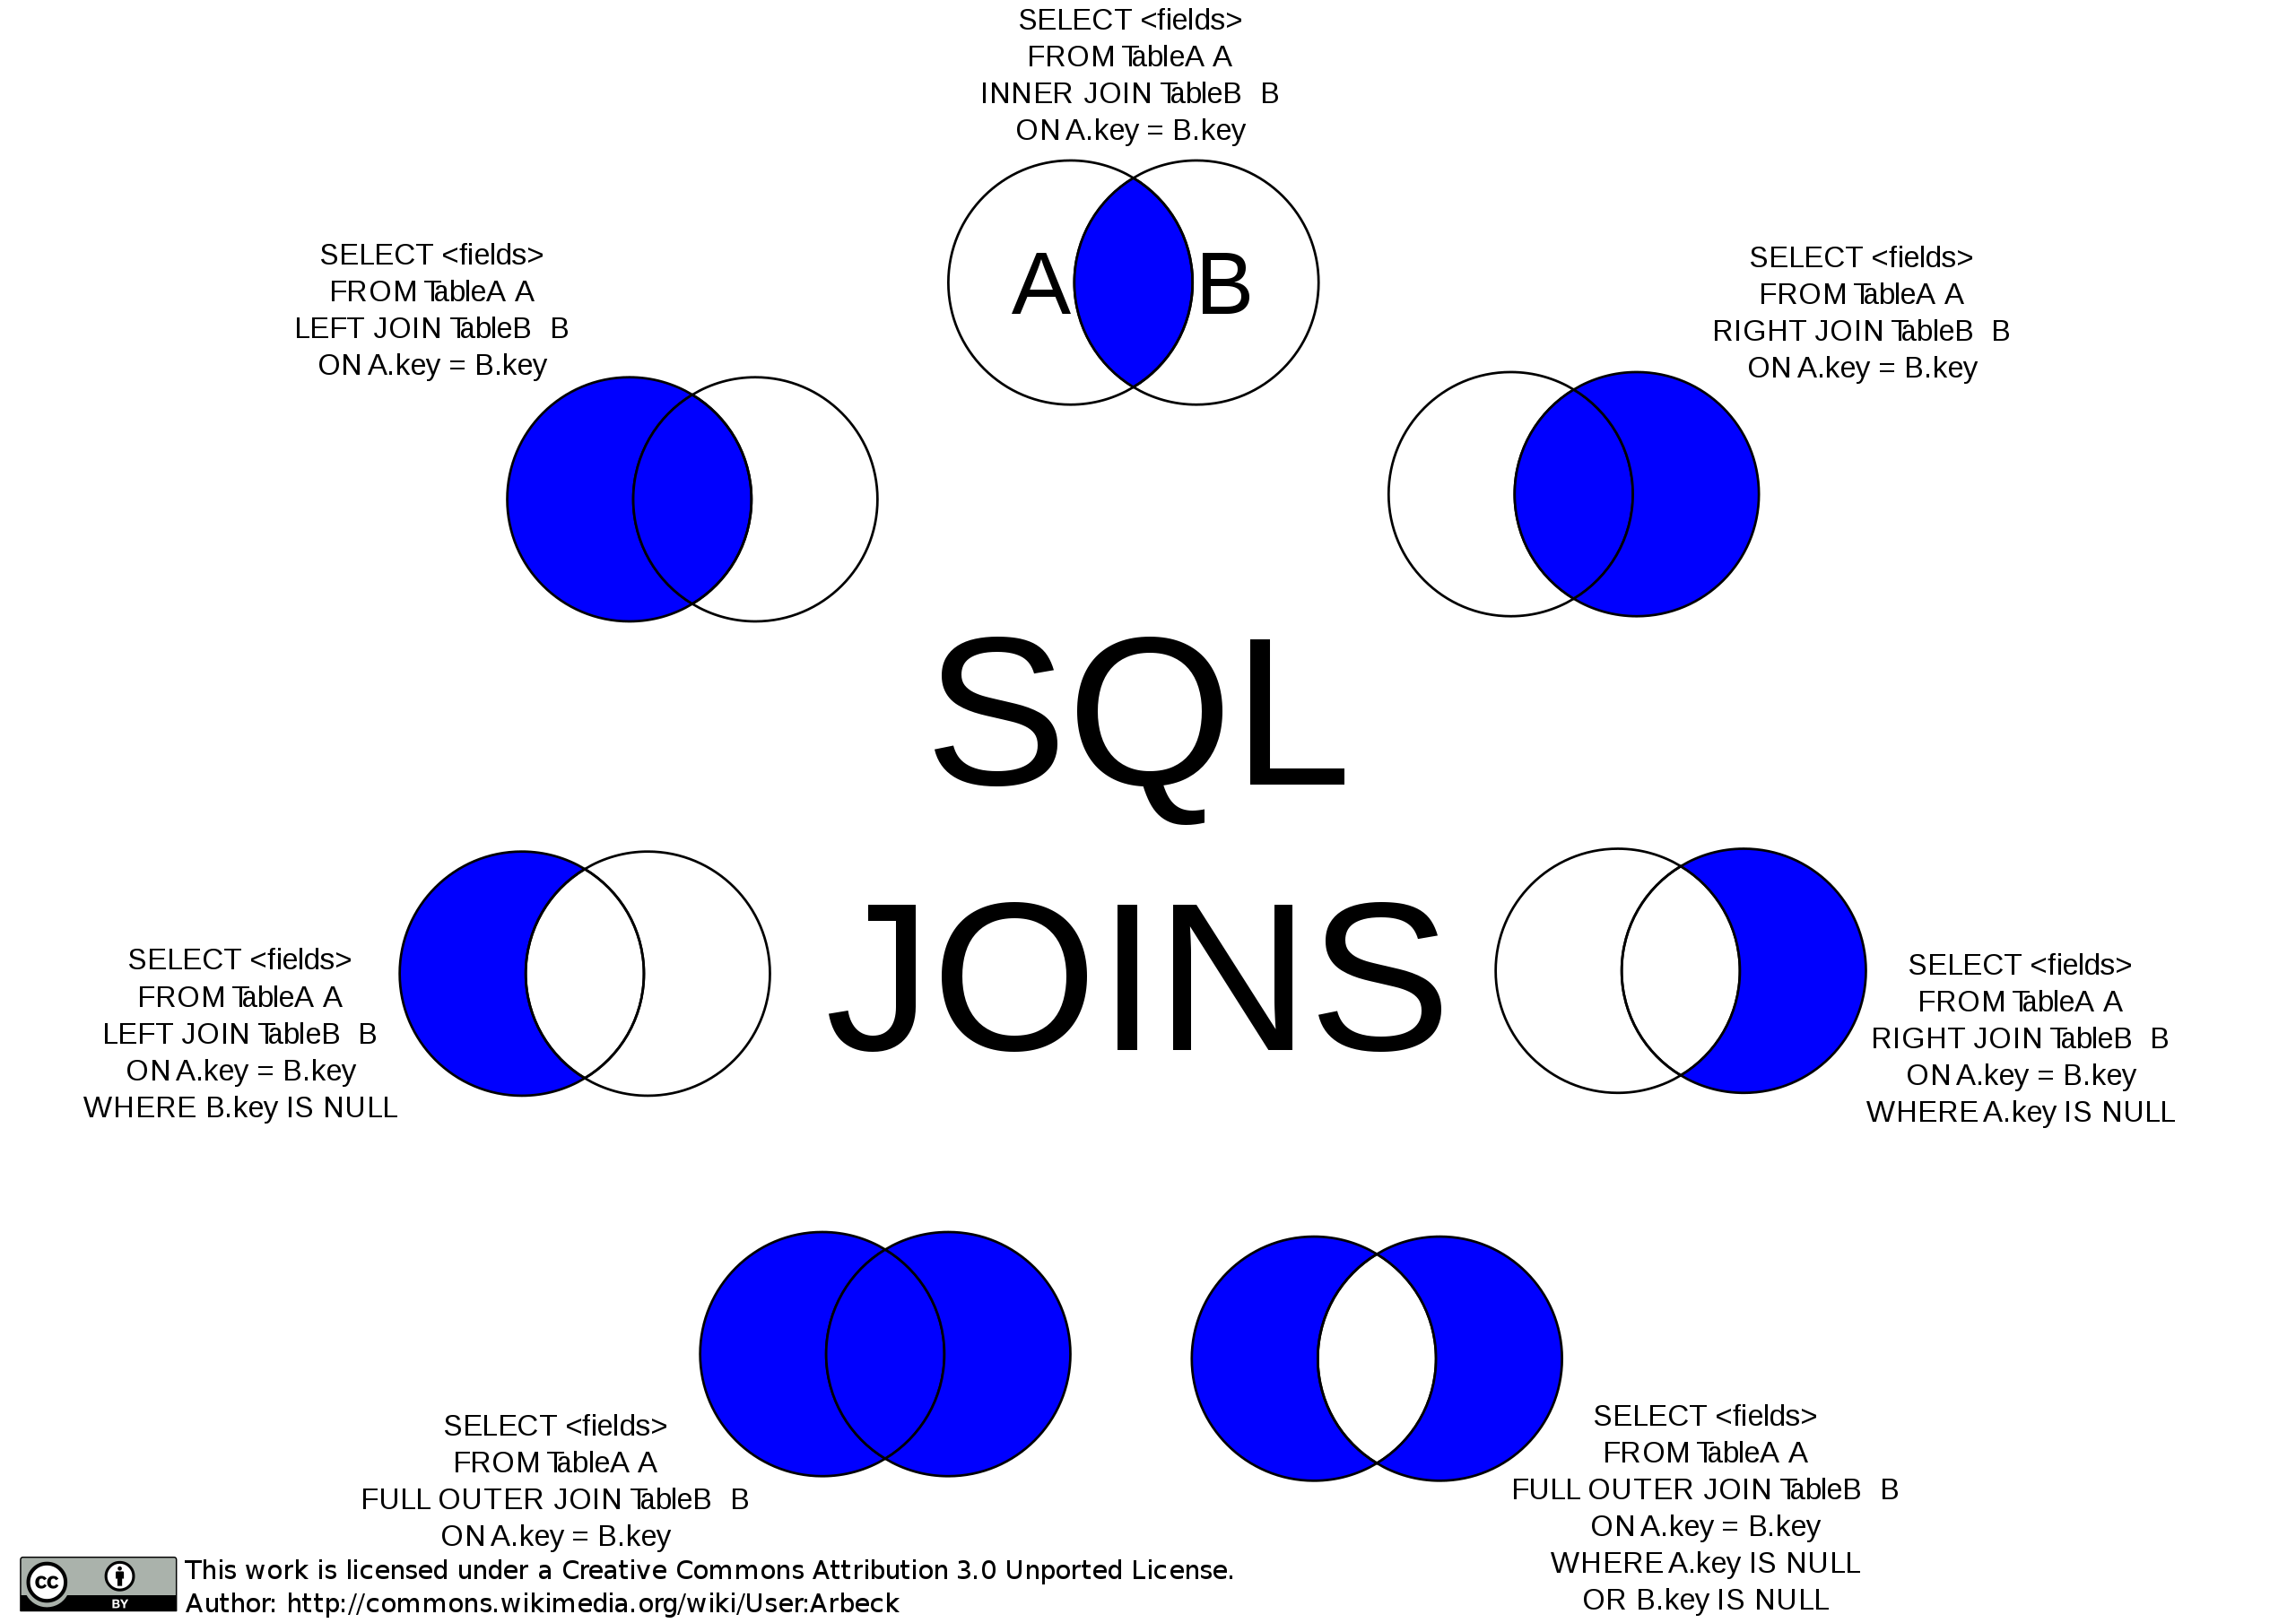

In [ ]:
SELECT поля_таблицы
FROM таблица_1 
[INNER] | [[LEFT | RIGHT | FULL][OUTER]] JOIN таблица_2 
    ON условие_объединения
[[INNER] | [[LEFT | RIGHT | FULL][OUTER]] JOIN таблица_n 
    ON условие_объединения]

In [12]:
# обратите внимание на то, как явным образом указывается таблица, в которой содержится искомое поле
result = cursor.execute("SELECT id, cell_id FROM chip_experiments AS exps"
                        "LEFT JOIN cells ON exps.cell_id = cells.id")

OperationalError: ambiguous column name: id

Синтаксис SQL запросов позволяет формировать вложенные запросы

In [ ]:
SELECT * 
FROM chip_experiments 
WHERE tf_uniprot_id IN (
    SELECT tf_uniprot_id 
    FROM chip_experiments 
    GROUP BY specie HAVING COUNT(tf_uniprot_id) > 100
)

In [ ]:
SELECT id, cell_id
FROM (
    SELECT * from chip_experiments WHERE tf_uniprot_id="P42224"
) GROUP BY cell_id HAVING COUNT(cell_id) > 10

В некоторых случаях требуется объединить результаты двух независимых запросов в один. Для рещ=шения данной задачи использует оператор **UNION**

In [ ]:
SELECT table_fields FROM list_of_tables ...
UNION [ALL] 
SELECT table_fields FROM list_of_tables ...

In [ ]:
SELECT id, cell_id, treatment FROM chip_experiments
UNION
SELECT id, cell_id treatment FROM dnase_expeirments 
WHERE cell_id = '113'

#### Создание и удаление баз данных

In [ ]:
CREATE DATABASE имя_бд; # создать БД с именем "имя_бд"
SHOW DATABASES; # вывести список БД
DROP DATABASE имя_бд; # удалить БД с именем "имя_бд"

# конструкция IF [NOT] EXISTS
CREATE DATABASE IF NOT EXIST имя_бд; # создать БД с именем "имя_бд", если её не существует
DROP DATABASE IF EXISTS имя_бд; # удалить БД с именем "имя_бд", если её не существует

#### Операторы модификации SQL-таблиц

Для добавления новых записей в таблицу используется метод **INSERT**

In [ ]:
INSERT INTO table_name [(table_field, ...)]
VALUES (value_of_table_field, ...)
| SELECT table_field, ... FROM table_name ...

In [ ]:
INSERT INTO cells (id, title, species) VALUES ('6754', 'new cell line title', 'Homo sapiens')

Однако не всегда мы можем с лёгкостью сказать, какой primary key будем присваивать записи. Данную проблему можно решить так:

In [ ]:
# 1ый способ
INSERT INTO cells (id, title, species) VALUES (COUNT(id) + 1, 'new cell line title', 'Homo sapiens')

# 2ой способ
# Если используется MySQL и PRIMARY_KEY объявлен как AUTO_INCREMENT
INSERT INTO cells (id, title, species) VALUES (Null, 'new cell line title', 'Homo sapiens')

In [ ]:
cursor.execute('INSERT INTO cells (id, title, species) VALUES (COUNT(id) + 1, ?, ?)',
               ('new cell line title', 'Homo sapiens'))

Последний запрос **INSERT** демонстрирует предпочтительный способ создания запросов с переменными. Вместо того чтобы строить строку запроса, безопаснее поставить **?** на место каждой переменной, а затем передать переменные в параметре-кортеже методу execute. Этот способ хорош тем, что вам не нужно беспокоиться о неправильном экранировании значений; sqlite3 сделает всё за вас.

Также можно выделять пременные префиксом : и передавать значения этих переменных словарём:

In [ ]:
cursor.execute('INSERT INTO cells (id, title, species) VALUES (COUNT(id) + 1, :title, :species)',
               {'title':'new cell line title', 'species':'Homo sapiens'})

Следует отметить, что по умолчанию **sqlite3** не выполняет немедленного закрепления транзакций. Вы должны вызвать объект **commit** метода **Connection**, чтобы обеспечить сохранение всех внесенных изменений

In [ ]:
con.commit() # Закрепление транзакции к базе данных
con.close() # Закрытие подключения

Для модификации уже существуюих в таблице записей используется оператор **UPDATE**

In [ ]:
UPDATE table_name
SET table_field1 = table_field_value1,
    table_fieldN = table_field_valueN
[WHERE the_conditions_of_the_limitations]


In [ ]:
UPDATE cells SET title = 'New new cell line title' WHERE id = '6754'

Для удаления записей из таблицы необходимо воспользоваться операторо **DELETE**:

In [ ]:
DELETE FROM table_name
[WHERE the_conditions_of_the_limitations];

In [ ]:
DELETE FROM cells WHERE id = '6754'

In [ ]:
cursor.execute("CREATE TABLE annotators (id INTEGER PRIMARY KEY," # создание таблицы
               "name TEXT, count INTEGER)")
cursor.execute("INSERT INTO people (name, count) VALUES ('Bob', 1)") # добавление новых записей
cursor.execute("INSERT INTO people (name, count) VALUES (?, ?)", ("Jill", 15)) # добавление новых записей
con.commit() 

cursor.execute("DROP TABLE annotators") # удаление таблицы
con.commit() 

### Объектно-реляционное отображение. ORM (Object Relational Mapper)

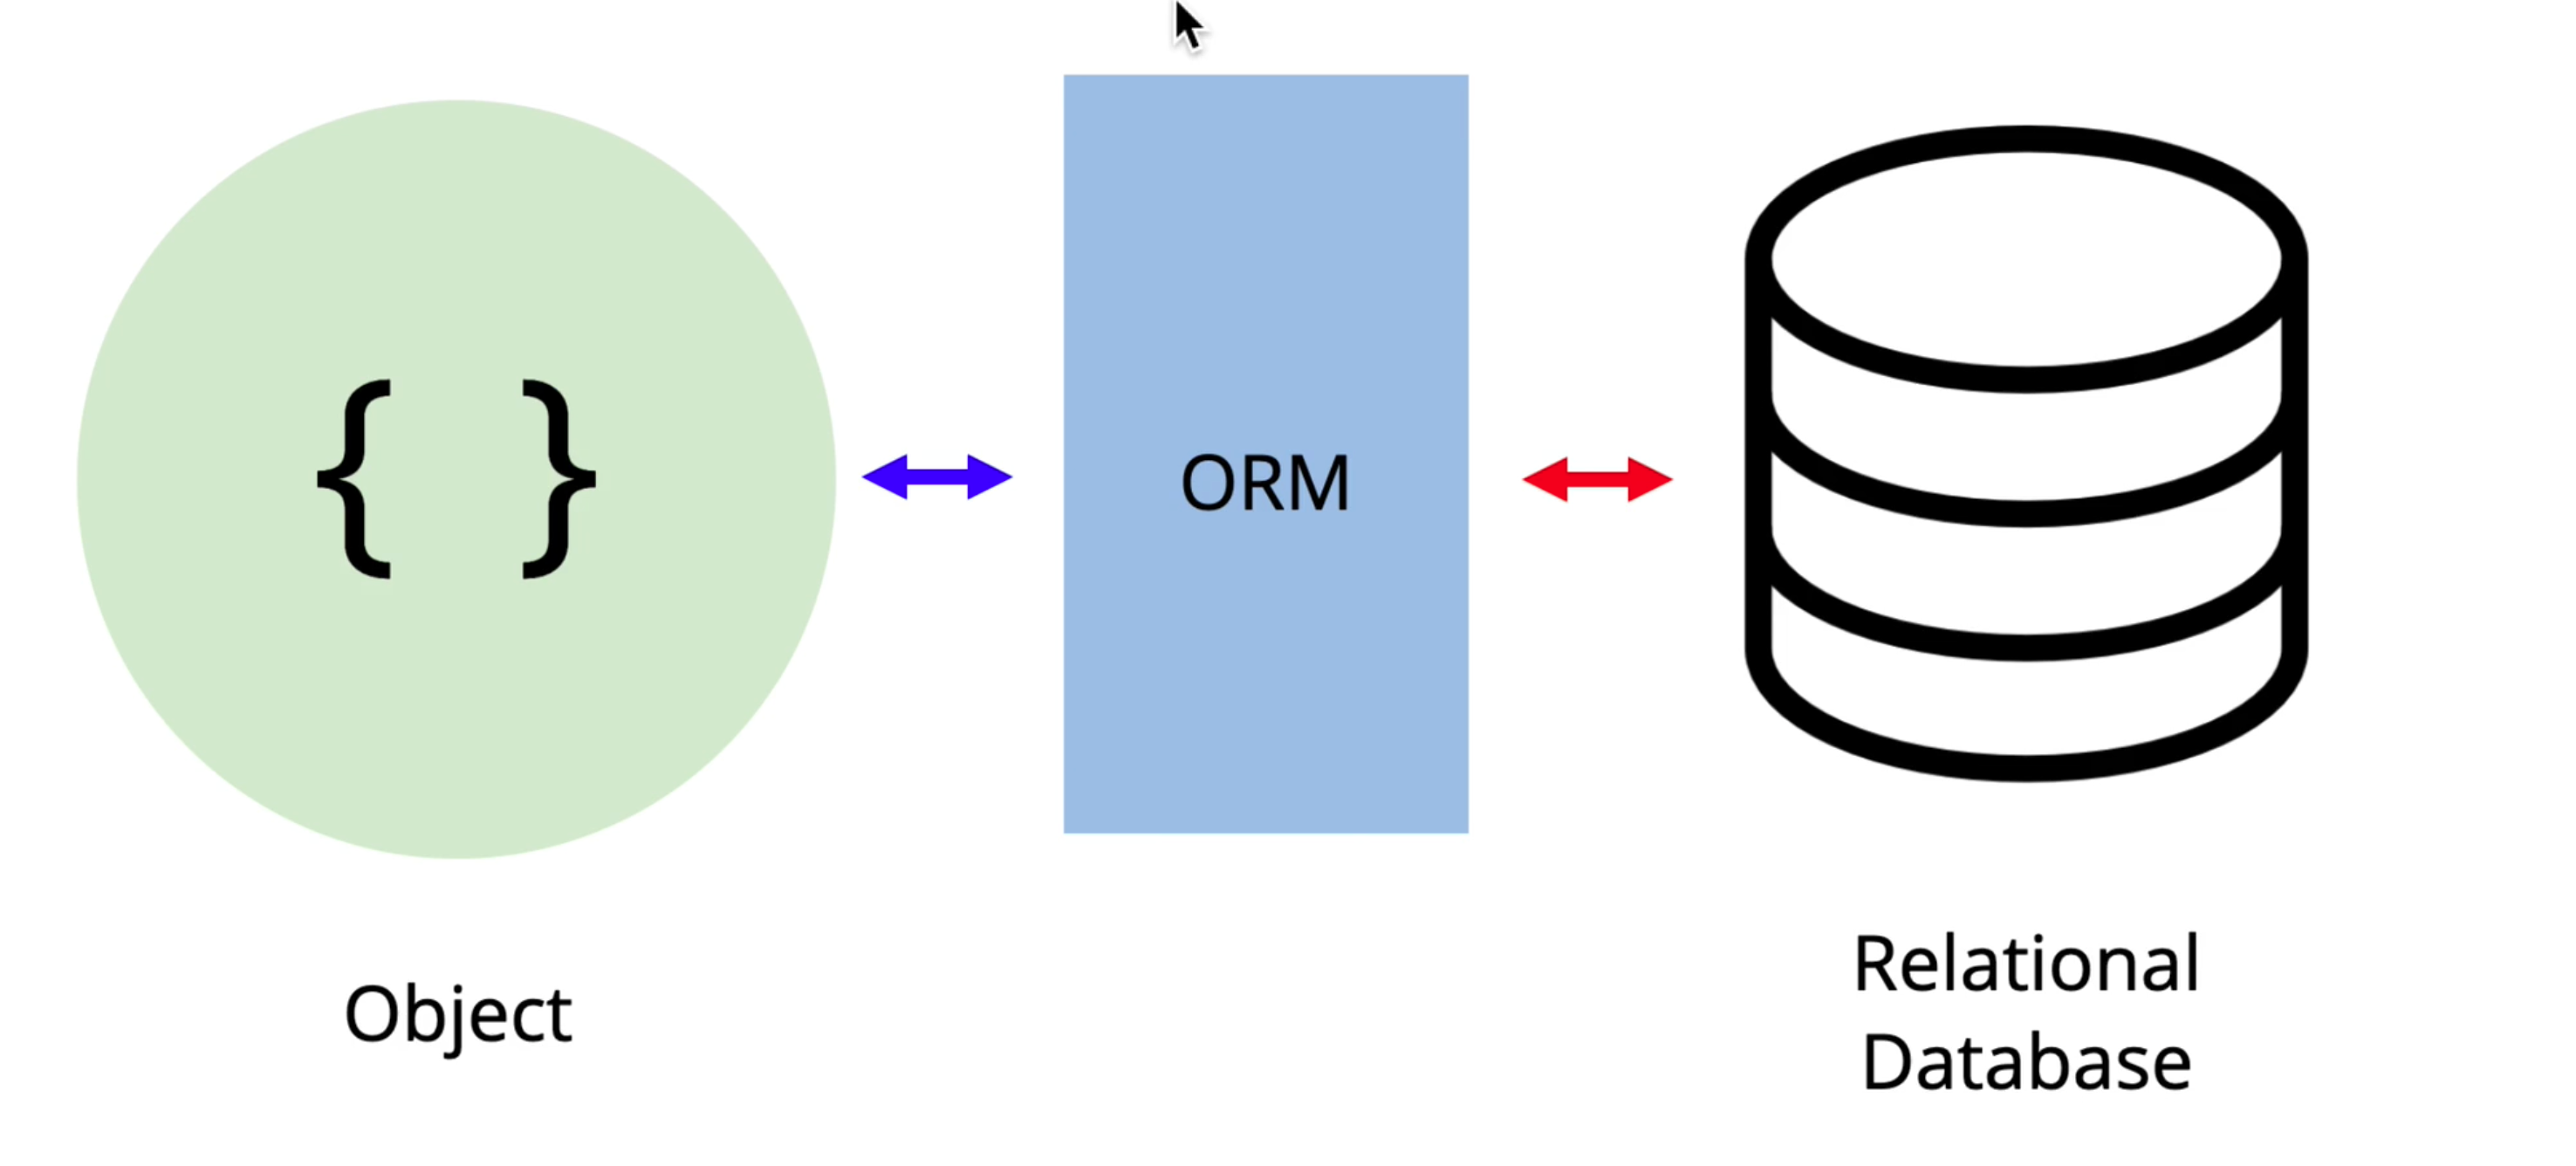

- Объектно-реляционное отображение, или ORM, позволяет еще больше стандартизировать код для разных баз данных.
- Использование ORM также позволяет работать с реляционными базами данных с использованием кода Python и объектов (вместо запросов SQL).

Статьи для факультативного чтения:
- Крадущийся тигр, затаившийся SQLAlchemy. Основы (https://habr.com/ru/post/559738/)

